In [1]:
from tensorflow.keras import datasets 

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

2024-11-01 14:19:22.416509: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 14:19:22.589006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730438362.671937    6594 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730438362.700057    6594 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 14:19:22.871888: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                           padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1730438368.354230    6594 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 77ms/step - accuracy: 0.9265 - loss: 0.2343 - val_accuracy: 0.9827 - val_loss: 0.0524
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.9855 - loss: 0.0455 - val_accuracy: 0.9814 - val_loss: 0.0577
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 153s 81ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.9897 - val_loss: 0.0342
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 149s 79ms/step - accuracy: 0.9926 - loss: 0.0222 - val_accuracy: 0.9907 - val_loss: 0.0311
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy: 0.9941 - loss: 0.0172 - val_accuracy: 0.9903 - val_loss: 0.0325


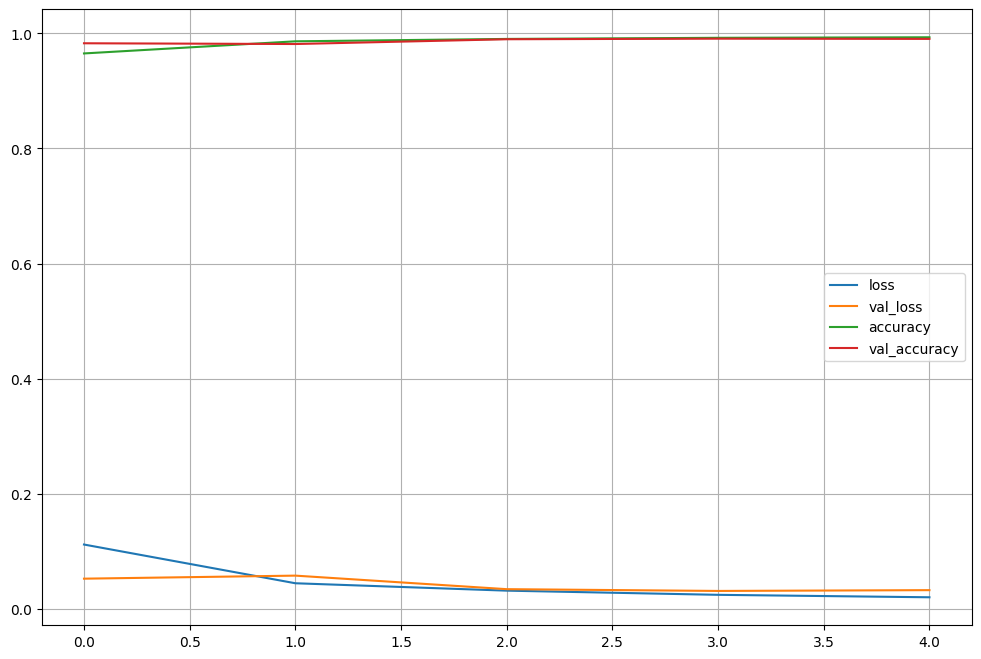

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [5]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9879 - loss: 0.0419
Test loss : 0.03251301497220993
Test accuracy : 0.9902999997138977


In [6]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)


len(wrong_result)

97

In [8]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[936,
 1878,
 582,
 1709,
 445,
 6608,
 1878,
 8408,
 2860,
 936,
 2035,
 4507,
 900,
 2654,
 947,
 9692]

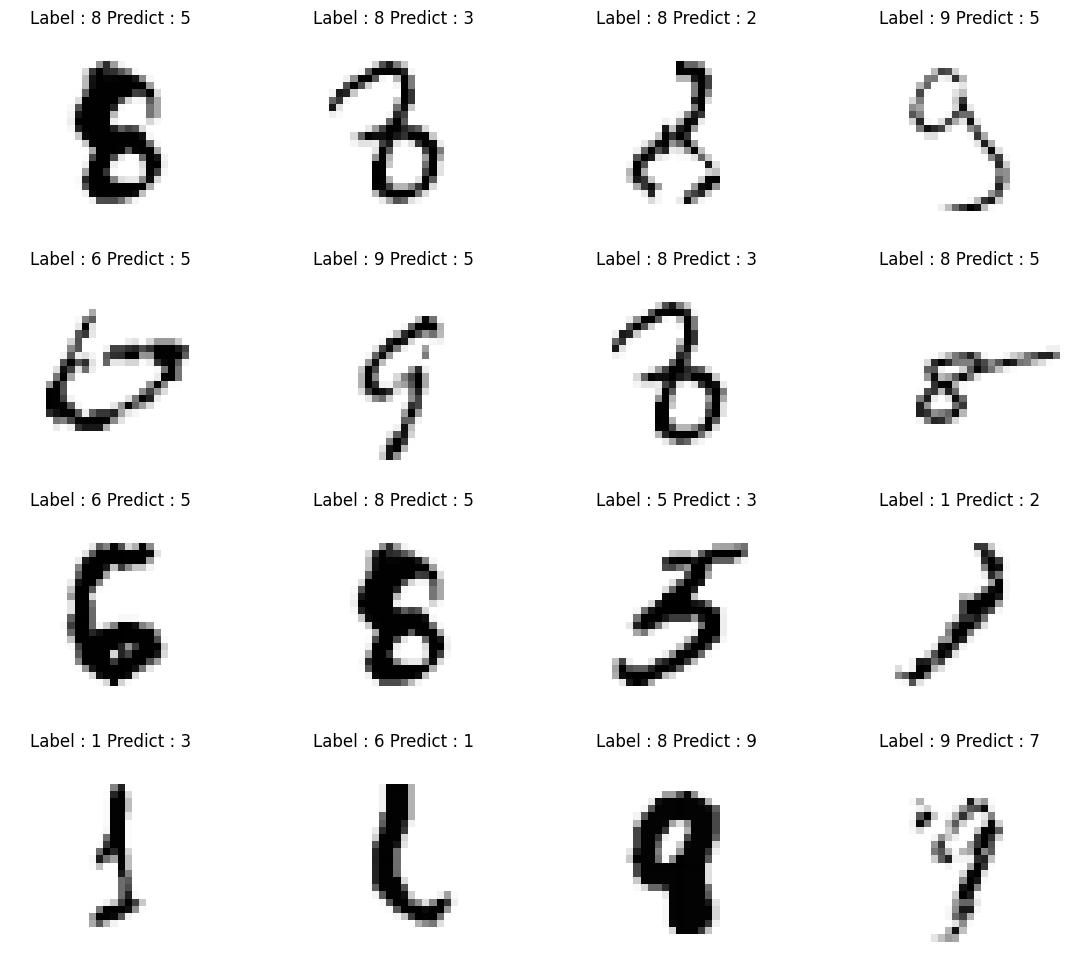

In [9]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()

In [10]:
model.save('../data/MNIST_CNN_model.h5')

In [11]:
from tensorflow.keras import datasets 

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test  / 255.0

X_tarin = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                           padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 114s 60ms/step - accuracy: 0.8071 - loss: 0.5293 - val_accuracy: 0.8858 - val_loss: 0.3135
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 55ms/step - accuracy: 0.8984 - loss: 0.2766 - val_accuracy: 0.8834 - val_loss: 0.3067
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 58ms/step - accuracy: 0.9149 - loss: 0.2284 - val_accuracy: 0.9053 - val_loss: 0.2609
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 60ms/step - accuracy: 0.9270 - loss: 0.1946 - val_accuracy: 0.9194 - val_loss: 0.2261
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 56ms/step - accuracy: 0.9373 - loss: 0.1648 - val_accuracy: 0.9182 - val_loss: 0.2386


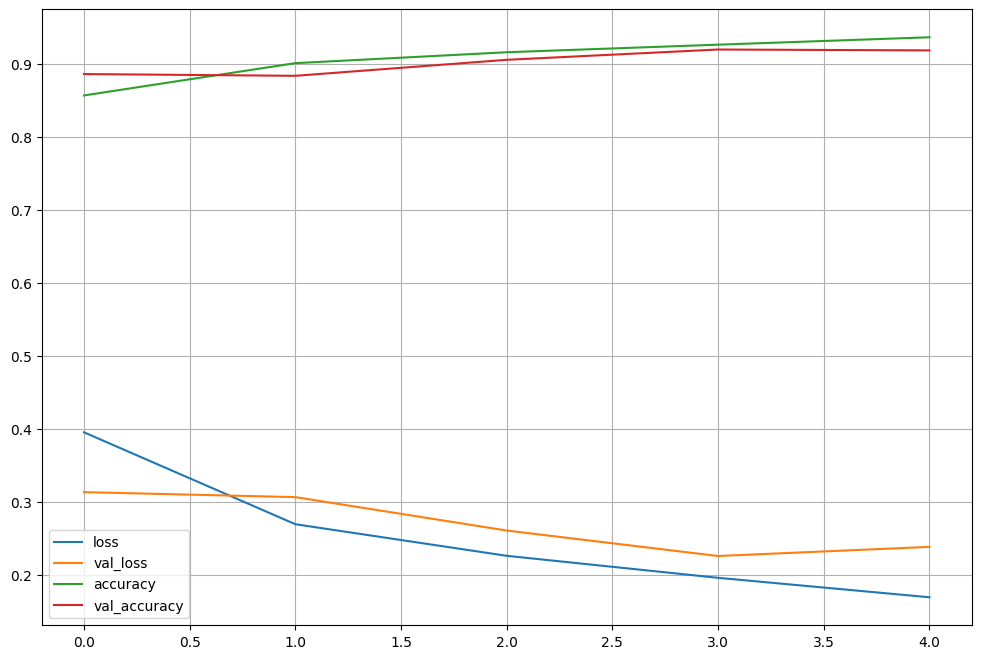

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [15]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9200 - loss: 0.2447
Test loss :  0.23859067261219025
Test accuracy :  0.9182000160217285


In [16]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [17]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

818

In [18]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2042,
 6926,
 5974,
 8710,
 3188,
 5316,
 8764,
 12,
 7646,
 7130,
 4166,
 7829,
 7654,
 6365,
 6874,
 9499]

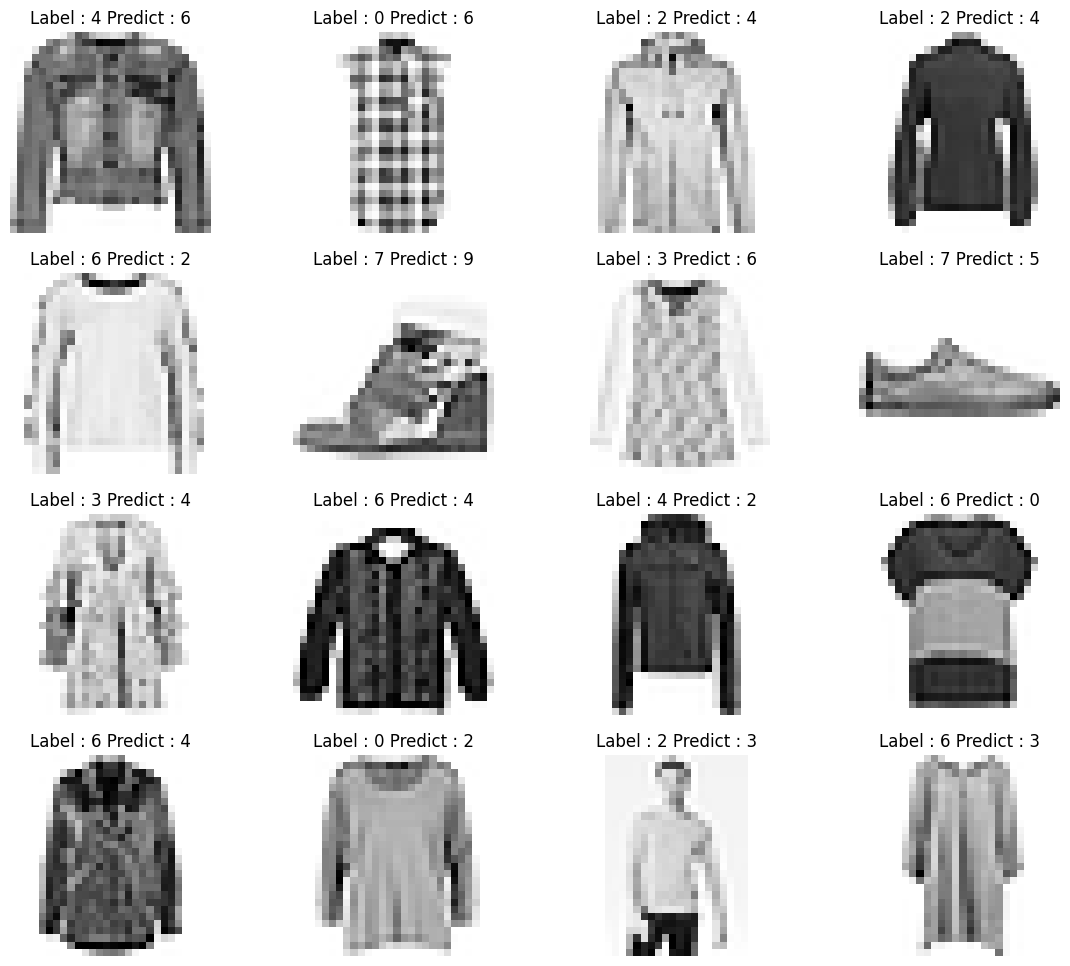

In [19]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()